### Predicting the Forest Cover Type - Multiclass classification (7 classes)

All of my projects are divided in 3 parts - 
* Preprocessing and visualisation of the data 
* Analysis of the data using machine learning algorithms 
* Validation and final testing with a test set(if exists)

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from collections import defaultdict
import json
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
rcParams['figure.figsize'] = (10, 5)
from IPython.display import display, Math, Latex

In [5]:
#read the data
df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

### Preprocessing and EDA

In [6]:
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [7]:
#there are no null values in the data, good for us
df.dropna().shape, df.shape

((15120, 56), (15120, 56))

In [8]:
#We don't need the below columns as they have the same value throughout the dataset
df.drop(['Soil_Type7', 'Soil_Type15'], inplace = True, axis = 1)

In [9]:
df.shape

(15120, 54)

In [10]:
grouped = df.groupby('Cover_Type').mean()

In [11]:
grouped_std = df.groupby('Cover_Type').std()

In [12]:
grouped

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,7996.077778,3128.025926,159.463426,13.112963,271.507407,41.281481,2579.715741,211.690278,223.248611,144.065741,...,0.052778,0.106481,0.085185,0.000000,0.001389,0.000000,0.000000,0.037037,0.036574,0.022685
2,6312.696759,2922.540278,151.097222,13.423611,287.728704,47.337963,2425.791667,214.044444,225.369907,142.950926,...,0.044907,0.118056,0.085185,0.005556,0.000463,0.000926,0.000000,0.003241,0.001389,0.001389
3,8127.537500,2398.423148,173.672685,20.628704,210.723148,64.081944,969.595833,201.655556,216.561111,141.549537,...,0.000000,0.002315,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,6354.585648,2223.420370,138.099537,18.468519,104.537500,40.143519,915.100463,227.968056,216.889815,111.808796,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,6486.800463,2786.801389,137.992130,16.724537,208.873148,50.871296,1329.318519,223.368981,218.317130,121.392593,...,0.040278,0.046296,0.053241,0.001852,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,8061.305093,2423.276852,180.617130,18.986111,160.095370,44.873611,1064.980556,193.562963,209.960648,147.682407,...,0.003241,0.013889,0.030556,0.000926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,9584.496759,3362.769907,155.794444,14.166667,346.904630,68.945833,2713.659722,216.639815,222.412037,136.193981,...,0.012500,0.032407,0.031019,0.001852,0.045370,0.003704,0.015741,0.296759,0.266204,0.188426


In [13]:
grouped_std

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,4546.422030,156.124988,117.280496,6.817153,221.250993,55.740461,1495.176212,25.399338,17.975428,36.114843,...,0.223641,0.308524,0.279222,0.000000,0.037251,0.000000,0.0000,0.188896,0.187757,0.148932
2,5052.088621,185.778268,107.320930,7.038483,215.373206,59.137843,1629.381089,25.033870,18.216843,35.187638,...,0.207149,0.322749,0.279222,0.074345,0.021517,0.030422,0.0000,0.056848,0.037251,0.037251
3,4094.227216,194.108147,108.013267,8.888591,142.053957,58.333807,620.000509,40.366706,27.519785,51.582375,...,0.000000,0.048068,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
4,3776.137635,102.929940,88.846589,9.361156,138.452917,58.343108,361.208979,24.288340,21.006249,49.383949,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
5,4537.811303,96.177469,91.772285,8.440048,179.159524,58.463641,1041.100986,22.487451,25.980805,50.121931,...,0.196655,0.210175,0.224565,0.043003,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
6,3949.174092,188.966981,133.087862,7.714618,125.770515,47.034674,576.384899,33.684031,23.934851,45.588500,...,0.056848,0.117057,0.172150,0.030422,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
7,3315.134330,109.126811,110.912616,7.315810,293.786336,80.400320,1206.313419,23.561316,19.405921,37.999255,...,0.111128,0.177121,0.173408,0.043003,0.208163,0.060759,0.1245,0.456935,0.442074,0.391142


In [14]:
features = ['Elevation', 'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Cover_Type']
small_df = df.ix[:1000, features] 

/usr/local/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


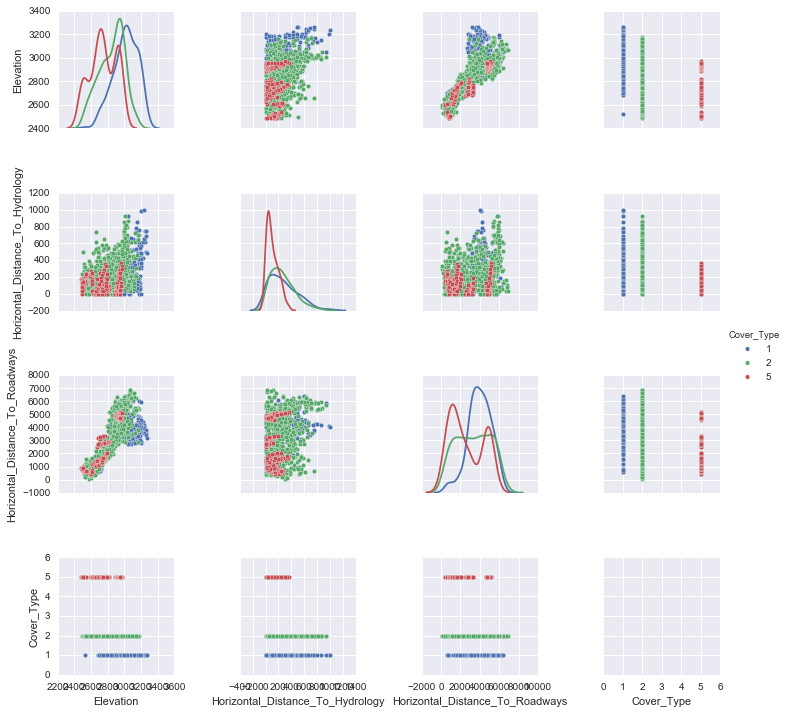

In [15]:
sns.pairplot(small_df, hue = 'Cover_Type', diag_kind='kde')

The only interesting thing I'm able to see in this plot is the distance to the roadways is increasing as the elevation is increasing...which means both the features are correlated. And correlated features can screw the results in the predictions..

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11764d5f8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117da2dd8>]], dtype=object)

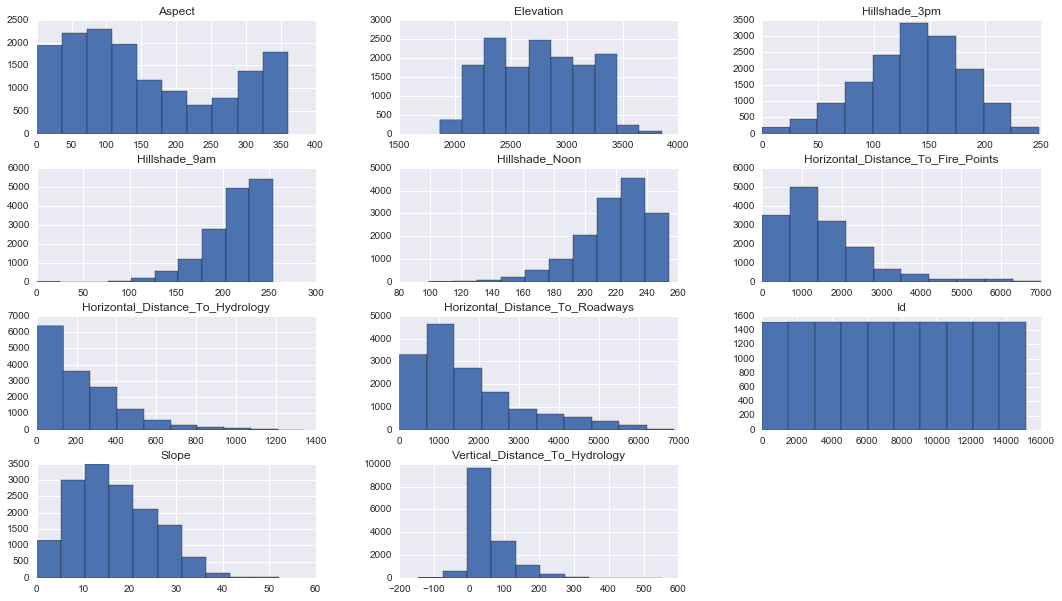

In [16]:
df.ix[:, :11].hist(figsize = (18, 10))

In [17]:
#Lets check how many are actually negative
df[df.Vertical_Distance_To_Hydrology < 0].groupby('Cover_Type').count()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,241,241,241,241,241,241,241,241,241,241,...,241,241,241,241,241,241,241,241,241,241
2,186,186,186,186,186,186,186,186,186,186,...,186,186,186,186,186,186,186,186,186,186
3,117,117,117,117,117,117,117,117,117,117,...,117,117,117,117,117,117,117,117,117,117
4,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
5,200,200,200,200,200,200,200,200,200,200,...,200,200,200,200,200,200,200,200,200,200
6,144,144,144,144,144,144,144,144,144,144,...,144,144,144,144,144,144,144,144,144,144
7,200,200,200,200,200,200,200,200,200,200,...,200,200,200,200,200,200,200,200,200,200


In [18]:
df['water_aboveorbelow'] = (df.Vertical_Distance_To_Hydrology >= 0) * 1

Not much information...

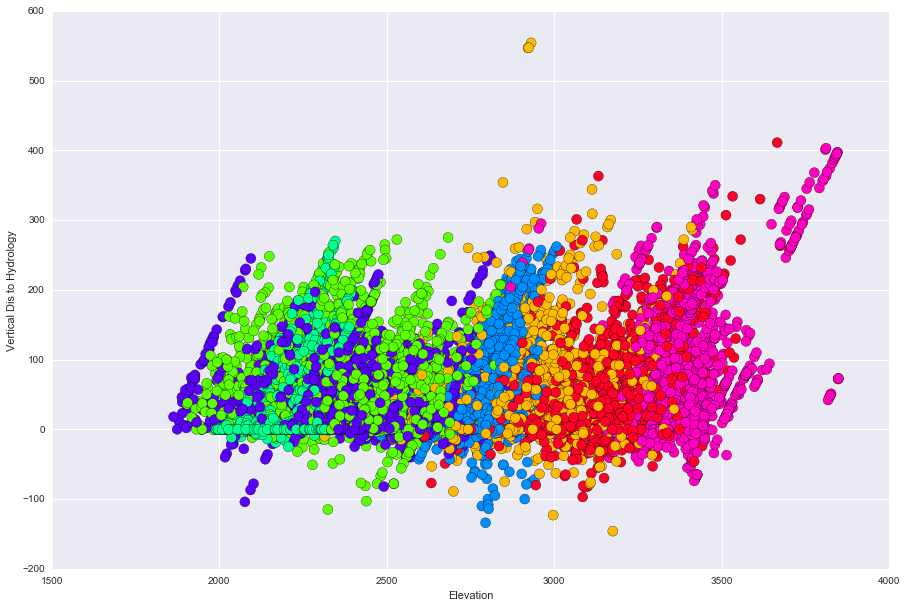

In [19]:
plt.figure(figsize = (15, 10))
plt.scatter(df.Elevation, df.Vertical_Distance_To_Hydrology, c = df.Cover_Type, cmap = cm.gist_rainbow, s = 100)
plt.xlabel("Elevation")
plt.ylabel("Vertical Dis to Hydrology")

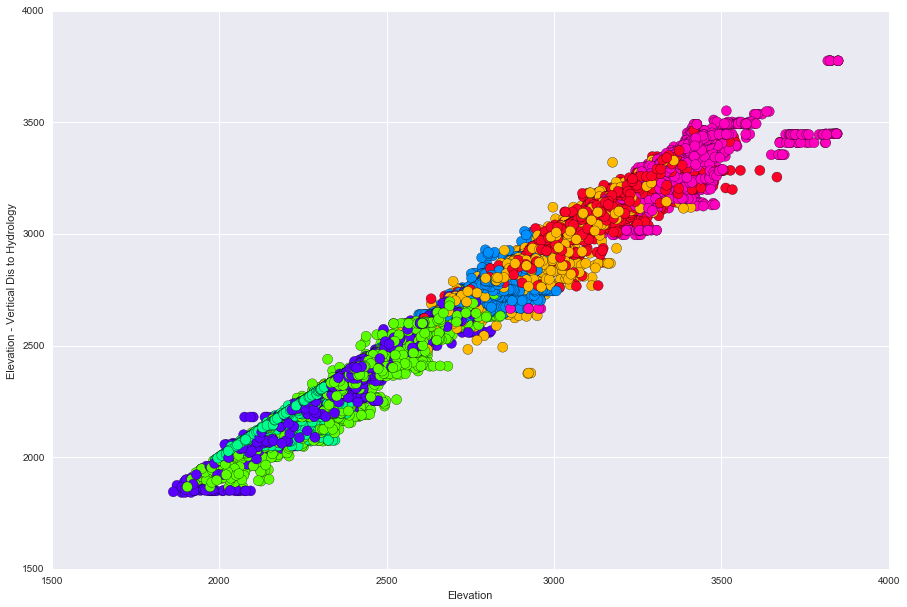

In [20]:
plt.figure(figsize = (15, 10))
plt.scatter(df.Elevation, - df.Vertical_Distance_To_Hydrology + df.Elevation
            , c = df.Cover_Type, cmap = cm.gist_rainbow, s = 100)
plt.xlabel("Elevation")
plt.ylabel("Elevation - Vertical Dis to Hydrology")

Well interesting plots above, some of my notations - 
    
* Horizontal distance to the roadways is increasing as the elevation is increasing from the scatter matrix above.
* Many of the features are quite not strong enough, like one above vertical distance to hydrology. It kind of remains constant for all the forest types 
* One of the most important features I see is Elevation.... it can be seen forming clusters in the above plots.

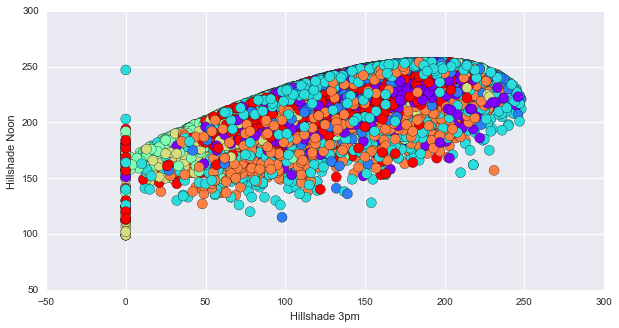

In [21]:
plt.figure(figsize = (10, 5))
plt.scatter(df.Hillshade_3pm, df.Hillshade_Noon, c = df.Cover_Type, cmap = cm.rainbow, s = 100)
plt.xlabel("Hillshade 3pm")
plt.ylabel("Hillshade Noon")

Some of the data has 0 values, this is quite weird. Lets try to replace these 0 values with the mean.

In [22]:
mean_hillshade = df.Hillshade_3pm.mean()
df.loc[df.Hillshade_3pm == 0, 'Hillshade_3pm'] = mean_hillshade

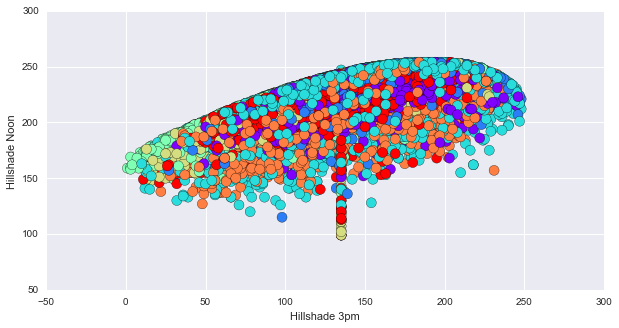

In [23]:
plt.figure(figsize = (10, 5))
plt.scatter(df.Hillshade_3pm, df.Hillshade_Noon, c = df.Cover_Type, cmap = cm.rainbow, s = 100)
plt.xlabel("Hillshade 3pm")
plt.ylabel("Hillshade Noon")

### Analysis 

In [24]:
#Hmm lets first create a train-test split 
from sklearn.cross_validation import train_test_split
feature_space = df.ix[:, :51]
feature_space['wat_aborbel'] = df['water_aboveorbelow']
feature_space.drop('Id', inplace=True, axis = 1)
cover_types = df['Cover_Type']
Xtrain, Xtest, ytrain, ytest = train_test_split(feature_space, cover_types, test_size = 0.2)

In [25]:
feature_space.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,wat_aborbel
0,2596,51,3,258,0,510,221,232,148.0,6279,...,0,0,0,0,0,0,0,0,0,1
1,2590,56,2,212,-6,390,220,235,151.0,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135.0,6121,...,0,0,0,0,0,0,0,0,0,1
3,2785,155,18,242,118,3090,238,238,122.0,6211,...,1,0,0,0,0,0,0,0,0,1
4,2595,45,2,153,-1,391,220,234,150.0,6172,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#implement the gridsearch method for parameter optimisation
from sklearn.grid_search import GridSearchCV
def grid_search_cv(clf, x, y, params, cv = 5):
    gs = GridSearchCV(clf, param_grid = params, cv = cv)
    gs.fit(x, y)
    print ("BEST", gs.best_params_, gs.best_score_, gs.grid_scores_)
    best_estimator = gs.best_estimator_
    return best_estimator

In [27]:
Xtrain.shape, ytrain.shape

((12096, 51), (12096,))

### Prediction through SVM

In [22]:
#First I'll try my hands on the SVM with varied costs and gamma for rbf and polynomial kernel 
#I'm not able to use grid search as its taking a lot of time.
from sklearn import svm
sv = svm.SVC(kernel = 'rbf', cache_size = 5000, C = 5, gamma = 1)
sv.fit(Xtrain, ytrain)

SVC(C=5, cache_size=5000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### The above snippet's gonna take a hell lot of time :(

In [31]:
#This was the score when I used the default kernel 
#clf.score(Xtest, ytest)

0.13657407407407407

Holy mother of God, how can this thing perform so poorly? (and toooo slow) Darn!

The problem, because of which the above code runs extremely slow for polynomial kernel is that the data is not normalised, if we look at the formula of polynomial kernel which is - 

$$K(x_a, x_b) = (x_a.x_b + 1)^d$$

It involves the inner product of the train data. Now the beast arrives, lets open this up (inner product of our training data)

$$K(x_a, x_b) = (x_{a1}.x_{b1} + x_{a2}.x_{b2} ..... x_{ad}.x_{bd} + 1)^d$$

Which means multiplying the above thinf d times... which can be really really computationally expensive. What we can try is normalise or standardize the data before using the polynomial kernel. So lets try to normalise the data and try again.

In [24]:
sv.predict(Xtest)

array([3, 3, 3, ..., 3, 3, 3])

In [34]:
#Hoping this time it works better...
#Standardizing the dataset
def r(x):
    if x+180>360:
        return x-180
    else:
        return x+180
Xtrain_svm = Xtrain.copy()
Xtest_svm = Xtest.copy()
Xtrain_svm['Elevation'] = (Xtrain.Elevation - Xtrain.Elevation.mean()) / (Xtrain.Elevation.std())
Xtest_svm['Elevation'] = (Xtest.Elevation - Xtest.Elevation.mean()) / (Xtest.Elevation.std())
Xtrain_svm['Aspect'] = Xtrain.Aspect.map(r)
Xtest_svm['Aspect'] = Xtest.Aspect.map(r)
Xtrain_svm['Horizontal_Distance_To_Roadways'] = (Xtrain.Horizontal_Distance_To_Roadways - Xtrain.Horizontal_Distance_To_Roadways.mean()) / (Xtrain.Horizontal_Distance_To_Roadways.std())
Xtest_svm['Horizontal_Distance_To_Roadways'] = (Xtest.Horizontal_Distance_To_Roadways - Xtest.Horizontal_Distance_To_Roadways.mean()) / (Xtest.Horizontal_Distance_To_Roadways.std())
Xtrain_svm['Horizontal_Distance_To_Fire_Points'] = (Xtrain.Horizontal_Distance_To_Fire_Points - Xtrain.Horizontal_Distance_To_Fire_Points.mean()) / (Xtrain.Horizontal_Distance_To_Fire_Points.std())
Xtest_svm['Horizontal_Distance_To_Fire_Points'] = (Xtest.Horizontal_Distance_To_Fire_Points - Xtest.Horizontal_Distance_To_Fire_Points.mean()) / (Xtest.Horizontal_Distance_To_Fire_Points.std())

In [29]:
#So now we have a standardized dataset for training the svm model.
Xtrain_svm.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,wat_aborbel
10349,1.629870,249,6,108,9,-0.388084,226,228,136.0,-0.425856,...,0,0,0,0,0,0,0,0,0,1
830,-0.046359,269,15,582,20,-0.474375,242,214,98.0,-0.560166,...,0,0,0,0,0,0,0,0,0,1
11739,0.260590,244,21,589,187,-0.834543,234,192,81.0,0.815601,...,0,0,0,0,0,0,0,0,0,1
9633,0.879284,158,5,30,0,-0.227509,209,233,162.0,-0.228929,...,0,0,0,0,0,0,0,0,0,1
3564,-1.135068,310,39,242,166,-0.537404,249,188,28.0,-0.986690,...,0,0,0,0,0,0,0,0,0,1


In [37]:
#I haven't tried GS yet.
from sklearn import svm
params  = {'C' : [1, 5, 10], 'gamma' : [0, 0.01, 0.1, 1]}
clf = svm.SVC(kernel = 'rbf')
clf = grid_search_cv(clf, Xtrain_svm, ytrain, params)

BEST {'gamma': 0.01, 'C': 10} 0.313740079365 [mean: 0.25976, std: 0.00379, params: {'gamma': 0, 'C': 1}, mean: 0.30713, std: 0.00623, params: {'gamma': 0.01, 'C': 1}, mean: 0.19783, std: 0.00340, params: {'gamma': 0.1, 'C': 1}, mean: 0.15228, std: 0.00014, params: {'gamma': 1, 'C': 1}, mean: 0.27083, std: 0.00653, params: {'gamma': 0, 'C': 5}, mean: 0.31267, std: 0.00570, params: {'gamma': 0.01, 'C': 5}, mean: 0.20122, std: 0.00519, params: {'gamma': 0.1, 'C': 5}, mean: 0.15377, std: 0.00058, params: {'gamma': 1, 'C': 5}, mean: 0.27108, std: 0.00615, params: {'gamma': 0, 'C': 10}, mean: 0.31374, std: 0.00498, params: {'gamma': 0.01, 'C': 10}, mean: 0.20114, std: 0.00509, params: {'gamma': 0.1, 'C': 10}, mean: 0.15377, std: 0.00058, params: {'gamma': 1, 'C': 10}]


In [38]:
#Wow what an achievement! Atleast it improved. 
clf.score(Xtest_svm, ytest)

0.34490740740740738

**I read and read and read about SVM. Well the rule of thumb is cross validate, cross validate, cross validate. If you want something to start with start with rbf, but if the dimention of the original data is already high just try to tune it using the linear kernel (separating just using a hyperplane) as there is no need to go in the higher dimentions. Just keep on trying kernels and accept the one which has the least out of sample error.** So lets try using linear kernel -

In [53]:
"""
LinearSVC Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear 
rather than libsvm, so it has more flexibility in the choice of penalties and loss functions
and should scale better to large numbers of samples.
"""
from sklearn.svm import LinearSVC
params  = {'C' : [1, 5, 10]}
clf = svm.LinearSVC()
clf = grid_search_cv(clf, Xtrain_svm, ytrain, params)

BEST {'C': 1} 0.525710978836 [mean: 0.52571, std: 0.04449, params: {'C': 1}, mean: 0.39873, std: 0.08950, params: {'C': 5}, mean: 0.45742, std: 0.05623, params: {'C': 10}]


In [60]:
clf = svm.LinearSVC(C = 1)
clf.fit(Xtrain_svm, ytrain)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [61]:
#The score achieved on the same kernel but on non-standardized data was 
#0.47652116402116401, so yeah standardization showed some results 
clf.score(Xtest_svm, ytest)

0.49371693121693122

In [62]:
pred = clf.predict(Xtest_svm)

So finally make it a rule of thumb to not use the polynomial kernel until and unless it becomes necessary

In [67]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
print (classification_report(ytest, pred))

             precision    recall  f1-score   support

          1       0.51      0.59      0.55       409
          2       0.30      0.62      0.41       436
          3       0.48      0.42      0.45       473
          4       0.53      0.98      0.69       446
          5       0.81      0.08      0.14       431
          6       0.56      0.06      0.10       424
          7       0.88      0.71      0.79       405

avg / total       0.58      0.49      0.44      3024



In [69]:
print (precision_score(ytest, pred, average = 'macro'))

0.580693336671


In [72]:
print (confusion_matrix(ytest, pred))

[[241 121   6   0   2   2  37]
 [117 272  33   2   5   4   3]
 [  0  64 197 202   0  10   0]
 [  0   0  10 436   0   0   0]
 [ 36 309  47   2  34   3   0]
 [  0 117 100 182   1  24   0]
 [ 80  18  18   0   0   0 289]]


### Prediction through decision trees - 

* Using RandomForest
* ExtraTreeClassifier
* GradientBoostingClassifier
* AdaBoost

In [34]:
#I tried this after writing the email...
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
clf.score(Xtest, ytest)

0.85648148148148151

In [40]:
pd.DataFrame(clf.feature_importances_,index=Xtrain.columns).sort([0], ascending=False) [:10]

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,0
Elevation,0.236196
Horizontal_Distance_To_Roadways,0.093645
Horizontal_Distance_To_Fire_Points,0.074854
Horizontal_Distance_To_Hydrology,0.062616
Vertical_Distance_To_Hydrology,0.053499
Hillshade_9am,0.052204
Aspect,0.050185
Hillshade_3pm,0.046668
Wilderness_Area4,0.046223
Hillshade_Noon,0.045302


In [43]:
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=400, criterion='gini', max_depth=None, 
    min_samples_split=2, min_samples_leaf=1, max_features='auto', 
    bootstrap=False, oob_score=False, n_jobs=-1, random_state=None, verbose=0)

Extra Tree Classifier or simply known as extremely random tree, goes one step further in the randomness. Contrary to the random forests which chooses the threshholds discriminately, it chooses it randomly and chooses the best of three. This again leads to reduction in variance with a little cost of bias.

In [45]:
forest.fit(Xtrain, ytrain)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [46]:
forest.score(Xtest, ytest)

0.85978835978835977

In [47]:
pd.DataFrame(forest.feature_importances_,index=Xtrain.columns).sort([0], ascending=False) [:10]

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,0
Elevation,0.173248
Horizontal_Distance_To_Roadways,0.081341
Horizontal_Distance_To_Fire_Points,0.066960
Wilderness_Area4,0.059302
Horizontal_Distance_To_Hydrology,0.057524
Vertical_Distance_To_Hydrology,0.049818
Aspect,0.049329
Hillshade_9am,0.049010
Hillshade_3pm,0.045910
Hillshade_Noon,0.045015


In [615]:
#using the gradient boosting method - 
from sklearn.ensemble import AdaBoostClassifier
params = {'learning_rate' : [0.01, 0.1, 1.1], 'n_estimators' : [100, 1000, 2500]}
adc = AdaBoostClassifier()
clf = grid_search_cv(adc, Xtrain, ytrain, params)

BEST {'n_estimators': 2500, 'learning_rate': 0.01} 0.426339285714 [mean: 0.31870, std: 0.00491, params: {'n_estimators': 100, 'learning_rate': 0.01}, mean: 0.40451, std: 0.01005, params: {'n_estimators': 1000, 'learning_rate': 0.01}, mean: 0.42634, std: 0.00350, params: {'n_estimators': 2500, 'learning_rate': 0.01}, mean: 0.39683, std: 0.01678, params: {'n_estimators': 100, 'learning_rate': 0.1}, mean: 0.38533, std: 0.01468, params: {'n_estimators': 1000, 'learning_rate': 0.1}, mean: 0.37426, std: 0.00840, params: {'n_estimators': 2500, 'learning_rate': 0.1}, mean: 0.36095, std: 0.02057, params: {'n_estimators': 100, 'learning_rate': 1.1}, mean: 0.36095, std: 0.02057, params: {'n_estimators': 1000, 'learning_rate': 1.1}, mean: 0.36095, std: 0.02057, params: {'n_estimators': 2500, 'learning_rate': 1.1}]


Till that runs I'll just tell a small difference between AdaBoost and GradientBooster, Adb tries to boost the decision tree by assigning weights to the misclassified values, whereas GradientBooster does that using the Gradient. 

In [616]:
clf.score(Xtest, ytest)

0.42261904761904762

In [617]:
from sklearn.ensemble import GradientBoostingClassifier
params = {'learning_rate' : [0.01, 0.1, 1.1], 'n_estimators' : [100, 1000, 2500]}
adc = GradientBoostingClassifier()
clf = GradientBoostingClassifier(n_estimators = 10000)
clf.fit(Xtrain, ytrain)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [1]:
clf.score(Xtest, ytest)

NameError: name 'clf' is not defined

In [8]:
import pandas as pd
df = pd.DataFrame({'a' : [1, 2, 3, 3, 4, 5]})

In [22]:
mask = df[df['a'].value_counts() == 1]

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


IndexingError: Unalignable boolean Series key provided

In [18]:
df[mask]

IndexError: indices are out-of-bounds

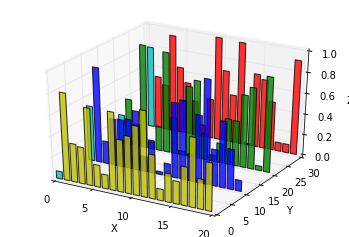

In [6]:
%matplotlib inline 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for c, z in zip(['r', 'g', 'b', 'y'], [30, 20, 10, 0]):
    xs = np.arange(20)
    ys = np.random.rand(20)

    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    cs = [c] * len(xs)
    cs[0] = 'c'
    ax.bar(xs, ys, zs=z, zdir='y', color=cs, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()
